                  Open        High         Low       Close     Volume  \
Date                                                                    
2019-12-31   27.000000   28.086000   26.805332   27.888666  154285500   
2020-01-02   28.299999   28.713333   28.114000   28.684000  142981500   
2020-01-03   29.366667   30.266666   29.128000   29.534000  266677500   
2020-01-06   29.364668   30.104000   29.333332   30.102667  151995000   
2020-01-07   30.760000   31.441999   30.224001   31.270666  268231500   
...                ...         ...         ...         ...        ...   
2022-10-03  254.500000  255.160004  241.009995  242.399994   98363500   
2022-10-04  250.520004  257.500000  242.009995  249.440002  109578500   
2022-10-05  245.009995  246.669998  233.270004  240.809998   86982700   
2022-10-06  239.440002  244.580002  235.350006  238.130005   69298400   
2022-10-07  233.940002  234.570007  222.020004  223.070007   83592300   

            Dividends  Stock Splits  
Date        

c:\Users\alen7\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




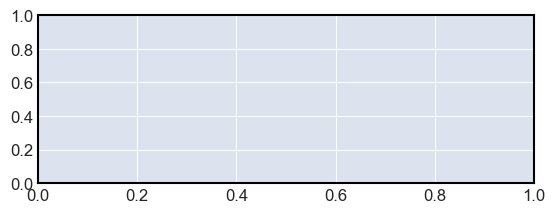

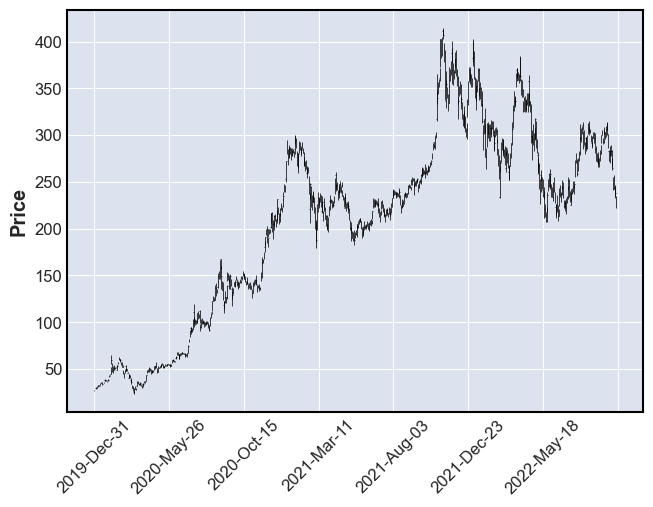

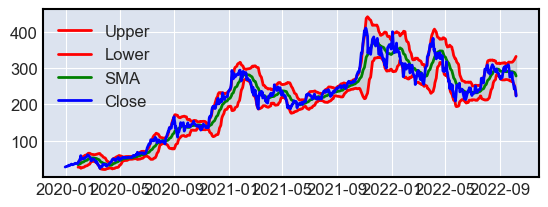

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
import mplfinance as mpf

stockid = 'TSLA'
id = yf.Ticker(stockid)
df = id.history(period="max",start="2020-01-01")
print(df)

period = 20

plt.subplot(2,1,1)
mpf.plot(df)


df['SMA'] = df['Close'].rolling(window=period).mean()
df['STD'] = df['Close'].rolling(window=period).std()
df['Upper'] = df['SMA'] + (df['STD']*2)
df['Lower'] = df['SMA'] - (df['STD']*2)
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)
buys = []
sells = []
open_pos = False

# for i in range(len(value)):
#     if value.Lower[i] > value.Close[i]:
#         if open_pos == False:
#             buys.append(i)
#             open_pos = True
#         elif value.Upper[i] < value.Close[i]:
#             if open_pos:
#                 sells.append(i)
#                 open_pos = False


plt.subplot(2,1,2)
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.2)
plt.plot(df.Upper, label='Upper', color='red')
plt.plot(df.Lower, label='Lower', color='red')
plt.plot(df.SMA, label='SMA', color='green')
plt.plot(df.Close, label='Close', color='blue')
plt.legend()
# plt.scatter(value.iloc[buys].index,value.iloc[buys].Close , marker='^',color='red')
# plt.scatter(value.iloc[sells].index,value.iloc[sells].Close , marker='v',color='green')
plt.show()
